Imports and Reading the Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df_complete = pd.read_csv('395963630_T_ONTIME_REPORTING.csv')

print("DataSet Shape", df_complete.shape)
print('Attributes in the dataset ',list(df_complete))
df_complete.head()

('DataSet Shape', (570118, 23))
('Attributes in the dataset ', ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 22'])


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
0,2018,1,27,6,19977,11697,12266,615,602.0,-13.0,...,0.0,NaN,0.0,966.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,27,6,19977,14747,14771,618,614.0,-4.0,...,0.0,NaN,0.0,679.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,27,6,19977,11278,12266,830,828.0,-2.0,...,0.0,NaN,0.0,1208.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,27,6,19977,12892,13930,650,641.0,-9.0,...,0.0,NaN,0.0,1744.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,27,6,19977,12451,11618,1824,1810.0,-14.0,...,0.0,NaN,0.0,820.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
interested_fields = ['OP_CARRIER_AIRLINE_ID', 'DAY_OF_WEEK',
                     'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
                     'DEP_TIME', 'DEP_DELAY',
                     'ARR_TIME', 'ARR_DELAY']
df = df_complete[interested_fields]

# Getting to know the dataset

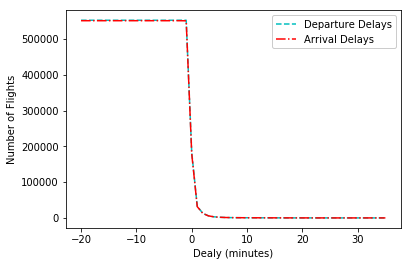

In [3]:
dep_delays = list()
arr_delays = list()
x = [x for x in range(-20, 36)]
for i in range(-20,36):
    dep_delays.append(len(df[df['DEP_DELAY']>i*60]))
    arr_delays.append(len(df[df['ARR_DELAY']>i*60]))
    

plt.plot(x, dep_delays, '--c', label='Departure Delays')
plt.plot(x, arr_delays, '-.r', label='Arrival Delays')
plt.xlabel('Dealy (minutes)')
plt.ylabel('Number of Flights')
plt.legend(framealpha=1, frameon=True);

Text(0,0.5,'Number of Flights')

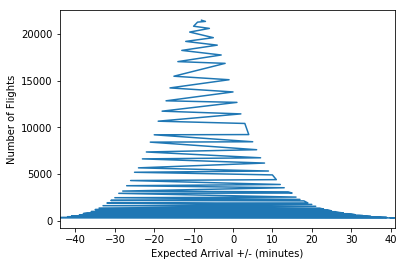

In [5]:
delays_time = df['ARR_DELAY']-df['DEP_DELAY']
delays_time.value_counts()[:40].plot()
plt.xlabel('Expected Arrival +/- (minutes)')
plt.ylabel('Number of Flights')

## How are the duration for flights fixed?

The expected arrival of the flight is of the Normal or Gaussian distribution with mean delay of -9 minutes. By setting the standard deviation +9 minutes, most of flights within the 2 standard deviations (>95%).

In other words, 50% of the time, the flight that you board is expected to arrive 9 minutes earlier than the scheduled time. +9 minutes is considered to ensure that most of the flights arrive on-time; in this case, more than 95% of the flights will be on-time.


The number of flights considered are 5.7L.

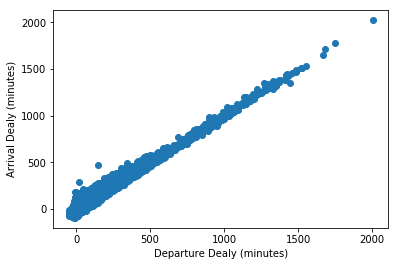

In [6]:
plt.scatter(df['DEP_DELAY'], df['ARR_DELAY'])
plt.xlabel('Departure Dealy (minutes)')
plt.ylabel('Arrival Dealy (minutes)')
plt.show()


A strong positive correlation between the Departure Dealy and the Arrival Delay, which is evident as the delay caused at the departure gets reflected at the arrival

('Total number of flights ', 570118)
('********************', 'On-Time Flights', '********************')
('% of Departures', 64.73607218154838)
('% of Arrivals', 65.26052501411988)
('% of both Departure and Arrival', 55.76108805545519)
('********************', 'Delayed Flights', '********************')
('% of Departures', 32.22543403295458)
('% of Arrivals', 31.47348443655524)
('% of both Departure and Arrival', 22.637945127149116)
('********************', 'Arrival - On-Time/Delay', '********************')
('On-Time at Departure but Delayed at Arrival', 8.81887609231773)


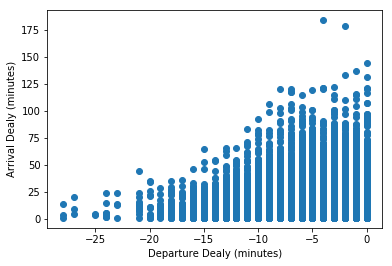

('Delayed at Departure but On-Time at Arrival', 9.432608688025988)


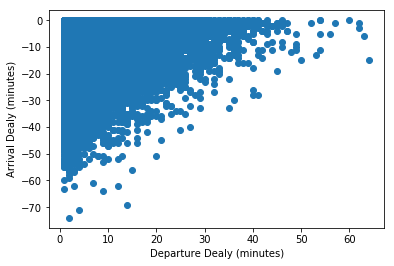

In [7]:
total_flights = len(df)
delayed_flights_at_departure = len(df[df['DEP_DELAY']>0])
delayed_flights_at_arrival = len(df[df['ARR_DELAY']>0])
ontime_flights_at_departure = len(df[df['DEP_DELAY']<=0])
ontime_flights_at_arrival = len(df[df['ARR_DELAY']<=0])
ontime_flights_both = len(df[(df['ARR_DELAY']<=0) & (df['DEP_DELAY']<=0)])
delyed_flights_both = len(df[(df['ARR_DELAY']>0) & (df['DEP_DELAY']>0)])


print("Total number of flights ", total_flights)

# On-Time Flights 
print("*"*20, "On-Time Flights","*"*20)
print("% of Departures", (100.0*ontime_flights_at_departure/total_flights))
print("% of Arrivals", (100.0*ontime_flights_at_arrival/total_flights))
print("% of both Departure and Arrival", (ontime_flights_both*100.0/total_flights))


# Delayed Flights 
print("*"*20, "Delayed Flights","*"*20)
print("% of Departures", (100.0*delayed_flights_at_departure/total_flights))
print("% of Arrivals", (100.0*delayed_flights_at_arrival/total_flights))
print("% of both Departure and Arrival", (delyed_flights_both*100.0/total_flights))


# Analysis at the Arrivals
dealyed_arrival = len(df[(df['DEP_DELAY']<=0) & (df['ARR_DELAY']>0)])
on_time_arrival = len(df[(df['DEP_DELAY']>0) & (df['ARR_DELAY']<=0)])
print("*"*20, "Arrival - On-Time/Delay","*"*20)

print("On-Time at Departure but Delayed at Arrival", (100.00*dealyed_arrival/total_flights))
df_temp = df[(df['DEP_DELAY']<=0) & (df['ARR_DELAY']>0)]
plt.scatter(df_temp['DEP_DELAY'], df_temp['ARR_DELAY'])
plt.xlabel('Departure Dealy (minutes)')
plt.ylabel('Arrival Dealy (minutes)')
plt.show()

print("Delayed at Departure but On-Time at Arrival", (100.00*on_time_arrival/total_flights))
df_temp = df[(df['DEP_DELAY']>0) & (df['ARR_DELAY']<=0)]
plt.scatter(df_temp['DEP_DELAY'], df_temp['ARR_DELAY'])
plt.xlabel('Departure Dealy (minutes)')
plt.ylabel('Arrival Dealy (minutes)')
plt.show()

## Learnings from the Data
1. Less than 60% of flights are truly on time (considering both departure and arrival)
2. Planes which are on-time at the source have more than 90% chances of being on time in the destination
3. If a plane gets delayed at the source, then the same plane has 70% chances of the plane getting delayed at destination 
4. Close to 10% of the flights which are delayed at the source make it on time or earlier at the source (Did the pilot increase the speed ??  o__O )
5. There is reasonably very less chance for the flight to be on-time if there is a departure delay of more than 45 minutes
6. A delayed flight at the source can reach up to 50 minutes earlier in the destination 
7. Even On-Time flights at the source have chances of getting delayed more than an hour at the destination

### Possible reasons why airline could be delayed ??

1. Poor operation of the orgin/destination airport
2. Poor operation by the airline
3. Weekday/Weekend/Holidays
4. 

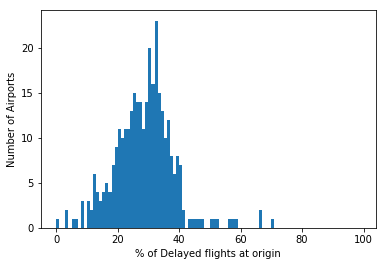

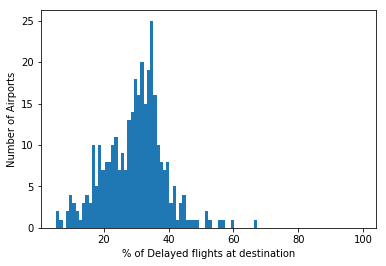

In [15]:
airport_delay = list()
for airport in df.ORIGIN_AIRPORT_ID.unique():
    df_airport = df[df['ORIGIN_AIRPORT_ID']==airport]
    total_flights = len(df_airport)
    dealyed_flights = len(df_airport[df_airport['DEP_DELAY']>0])
    airport_delay.append(dealyed_flights*100.0/total_flights)

plt.hist(airport_delay, bins=np.arange(min(airport_delay), max(airport_delay)))
plt.xlabel('% of Delayed flights at origin')
plt.ylabel('Number of Airports')
plt.show()

airport_delay = list()
for airport in df.DEST_AIRPORT_ID.unique():
    df_airport = df[df['DEST_AIRPORT_ID']==airport]
    total_flights = len(df_airport)
    dealyed_flights = len(df_airport[df_airport['DEP_DELAY']>0])
    airport_delay.append(dealyed_flights*100.0/total_flights)

plt.hist(airport_delay, bins=np.arange(min(airport_delay), max(airport_delay)))
plt.xlabel('% of Delayed flights at destination')
plt.ylabel('Number of Airports')
plt.show()


Most of the airports have more than 20% of its flight delayed both at the source and destination.

Text(0,0.5,'Number of Carriers')

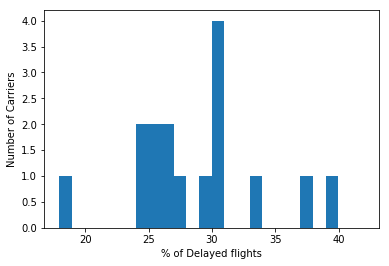

In [13]:
airport_delay = list()
for airport in df.OP_CARRIER_AIRLINE_ID.unique():
    df_carrier = df[df['OP_CARRIER_AIRLINE_ID']==airport]
    total_flights = len(df_carrier)
    dealyed_flights = len(df_carrier[df_carrier['DEP_DELAY']>0])
    airport_delay.append(dealyed_flights*100.0/total_flights)

plt.hist(airport_delay, bins=np.arange(min(airport_delay), max(airport_delay)))
plt.xlabel('% of Delayed flights')
plt.ylabel('Number of Carriers')

In [10]:
list(df)

['OP_CARRIER_AIRLINE_ID',
 'DAY_OF_WEEK',
 'ORIGIN_AIRPORT_ID',
 'DEST_AIRPORT_ID',
 'DEP_TIME',
 'DEP_DELAY',
 'ARR_TIME',
 'ARR_DELAY']